In [1]:
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = """Jack and jill went up the hill
to fetch a pail of water
jack fell down and broke his crown
and jill came tumbling after"""

In [3]:
data

'Jack and jill went up the hill\nto fetch a pail of water\njack fell down and broke his crown\nand jill came tumbling after'

In [4]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [5]:
tokenizer.fit_on_texts([data])

In [7]:
encoded = tokenizer.texts_to_sequences([data])[0]
encoded

[2,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 2,
 14,
 15,
 1,
 16,
 17,
 18,
 1,
 3,
 19,
 20,
 21]

In [8]:
tokenizer.word_index

{'and': 1,
 'jack': 2,
 'jill': 3,
 'went': 4,
 'up': 5,
 'the': 6,
 'hill': 7,
 'to': 8,
 'fetch': 9,
 'a': 10,
 'pail': 11,
 'of': 12,
 'water': 13,
 'fell': 14,
 'down': 15,
 'broke': 16,
 'his': 17,
 'crown': 18,
 'came': 19,
 'tumbling': 20,
 'after': 21}

## One Word in One Word Out

In [ ]:
sequences = list()

In [ ]:
for i in range(1, len(encoded)):
  sequence = encoded[i-1:i+1]
  sequences.append(sequence)

In [ ]:
sequences

[[2, 1],
 [1, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 2],
 [2, 14],
 [14, 15],
 [15, 1],
 [1, 16],
 [16, 17],
 [17, 18],
 [18, 1],
 [1, 3],
 [3, 19],
 [19, 20],
 [20, 21]]

In [ ]:
len(sequences)

24

In [ ]:
sequences = np.array(sequences)

In [ ]:
X, y = sequences[:,0], sequences[:,1]

In [ ]:
X

array([ 2,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1,
       16, 17, 18,  1,  3, 19, 20])

In [ ]:
y

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1, 16,
       17, 18,  1,  3, 19, 20, 21])

In [ ]:
y = keras.utils.to_categorical(sequences[:, 1])

In [ ]:
y.shape

(24, 22)

In [ ]:
vocab_size = len(tokenizer.word_index)

In [ ]:
vocab_size

21

In [ ]:
X = X.reshape(X.shape[0], 1)

### Creating a simple RNN Model

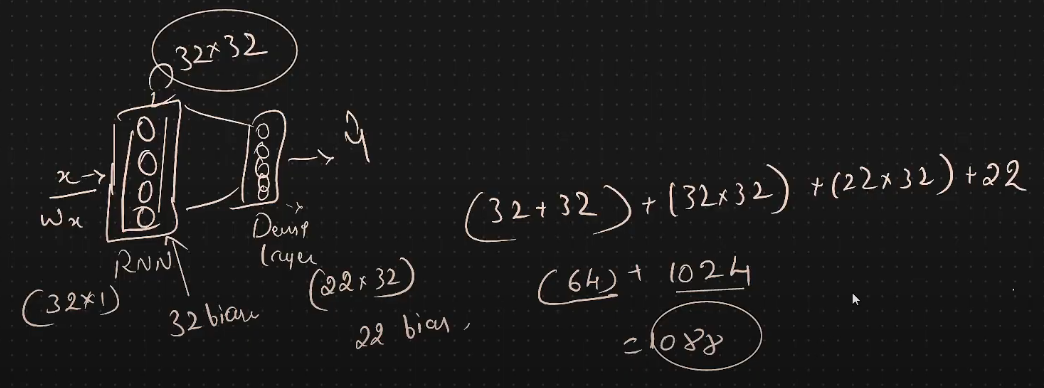

In [ ]:
model = Sequential()

In [ ]:
model.add(SimpleRNN(32, input_shape = (1,1), return_sequences=True))
model.add(SimpleRNN(32, input_shape = (1,1), return_sequences=False))
model.add(keras.layers.Dense(vocab_size*2, activation='relu'))
model.add(keras.layers.Dense(vocab_size+1, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 1, 32)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 42)             │         1,386 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 22)             │           946 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,500 (21.48 KB)

 Trainable params: 5,500 (21.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['Accuracy']
)

In [ ]:
history = model.fit(X,y, epochs=3000, verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
1/1 - 0s - 60ms/step - Accuracy: 0.7500 - loss: 0.7760
Epoch 502/3000
1/1 - 0s - 58ms/step - Accuracy: 0.7500 - loss: 0.7742
Epoch 503/3000
1/1 - 0s - 50ms/step - Accuracy: 0.7500 - loss: 0.7738
Epoch 504/3000
1/1 - 0s - 60ms/step - Accuracy: 0.7500 - loss: 0.7718
Epoch 505/3000
1/1 - 0s - 51ms/step - Accuracy: 0.7500 - loss: 0.7705
Epoch 506/3000
1/1 - 0s - 57ms/step - Accuracy: 0.7500 - loss: 0.7694
Epoch 507/3000
1/1 - 0s - 58ms/step - Accuracy: 0.7917 - loss: 0.7678
Epoch 508/3000
1/1 - 0s - 49ms/step - Accuracy: 0.7917 - loss: 0.7672
Epoch 509/3000
1/1 - 0s - 50ms/step - Accuracy: 0.7500 - loss: 0.7670
Epoch 510/3000
1/1 - 0s - 57ms/step - Accuracy: 0.7500 - loss: 0.7642
Epoch 511/3000
1/1 - 0s - 59ms/step - Accuracy: 0.7917 - loss: 0.7670
Epoch 512/3000
1/1 - 0s - 60ms/step - Accuracy: 0.7917 - loss: 0.7628
Epoch 513/3000
1/1 - 0s - 48ms/step - Accuracy: 0.7500 - loss: 0.7660
Epoch 514/3000
1/1 - 0s - 59ms/step - A

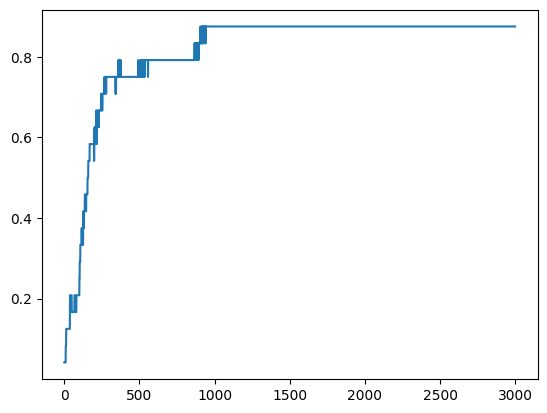

In [ ]:
plt.plot(history.history['Accuracy'])

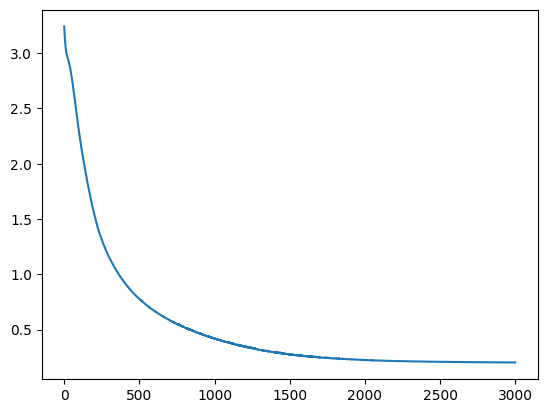

In [ ]:
plt.plot(history.history['loss'])

### Testing the Model

In [ ]:
in_text = 'jack'
encoded1 = tokenizer.texts_to_sequences([in_text])[0]
encoded1 = np.array(encoded1)

In [ ]:
encoded1

array([2])

In [ ]:
yhat_probs = model.predict(encoded1.reshape(1, 1))
yhat = np.argmax(yhat_probs, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
yhat

array([1])

In [ ]:
for word, index in tokenizer.word_index.items():
  if index == yhat:
    print(word)

and


In [ ]:
data

'Jack and jill went up the hill\nto fetch a pail of water\njack fell down and broke his crown\nand jill came tumbling after'

In [ ]:
in_text = 'jill'
encoded1 = tokenizer.texts_to_sequences([in_text])[0]
encoded1 = np.array(encoded1)
yhat = np.argmax(model.predict(encoded1.reshape(1, 1)), axis=-1)
for word, index in tokenizer.word_index.items():
  if index == yhat:
    print(word)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
came


In [ ]:
def seq_gen():
  in_text = 'Jack'
  for i in range(10):
    encoded1 = tokenizer.texts_to_sequences([in_text])[0]
    encoded1 = np.array(encoded1)
    predictions = model.predict(encoded1.reshape(1, 1))[0]
    random_choice = np.random.choice(predictions[1:])
    yhat = list(predictions[1:]).index(random_choice)
    for word, index in tokenizer.word_index.items():
      if index == yhat:
        print(word)
        in_text = word

In [ ]:
seq_gen()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
up
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
broke
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
jack
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
jack
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
went
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
fetch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
fetch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
jack
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
a


## Two words in one word out

In [9]:
sequences = list()
for i in range(2, len(encoded)):
  sequence = encoded[i-2:i+1]
  sequences.append(sequence)

In [10]:
sequences

[[2, 1, 3],
 [1, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [7, 8, 9],
 [8, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 13],
 [12, 13, 2],
 [13, 2, 14],
 [2, 14, 15],
 [14, 15, 1],
 [15, 1, 16],
 [1, 16, 17],
 [16, 17, 18],
 [17, 18, 1],
 [18, 1, 3],
 [1, 3, 19],
 [3, 19, 20],
 [19, 20, 21]]

In [11]:
sequences = np.array(sequences)

In [12]:
X, y = sequences[:,0:2], sequences[:, -1]

In [13]:
X, y

(array([[ 2,  1],
        [ 1,  3],
        [ 3,  4],
        [ 4,  5],
        [ 5,  6],
        [ 6,  7],
        [ 7,  8],
        [ 8,  9],
        [ 9, 10],
        [10, 11],
        [11, 12],
        [12, 13],
        [13,  2],
        [ 2, 14],
        [14, 15],
        [15,  1],
        [ 1, 16],
        [16, 17],
        [17, 18],
        [18,  1],
        [ 1,  3],
        [ 3, 19],
        [19, 20]]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  2, 14, 15,  1, 16, 17,
        18,  1,  3, 19, 20, 21]))

In [14]:
sequences = np.array(sequences)

In [15]:
sequences

array([[ 2,  1,  3],
       [ 1,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12],
       [11, 12, 13],
       [12, 13,  2],
       [13,  2, 14],
       [ 2, 14, 15],
       [14, 15,  1],
       [15,  1, 16],
       [ 1, 16, 17],
       [16, 17, 18],
       [17, 18,  1],
       [18,  1,  3],
       [ 1,  3, 19],
       [ 3, 19, 20],
       [19, 20, 21]])

In [16]:
len(sequences)

23

In [17]:
X.shape

(23, 2)

In [18]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [19]:
X.shape

(23, 2, 1)

In [20]:
len(tokenizer.word_counts)

21

In [21]:
y = keras.utils.to_categorical(y)

In [22]:
y.shape

(23, 22)

In [25]:
vocab_size = len(tokenizer.word_index)

In [26]:
model1 = Sequential()

In [27]:
model1.add(SimpleRNN(32, input_shape=(2,1), return_sequences=True))
model1.add(SimpleRNN(32, input_shape=(2,1), return_sequences=False))
model1.add(keras.layers.Dense(vocab_size*2, activation='relu'))
model1.add(keras.layers.Dense(vocab_size+1, activation='softmax'))

In [28]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 2, 32)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 42)             │         1,386 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │           946 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,500 (21.48 KB)

 Trainable params: 5,500 (21.48 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
history1 = model1.fit(X, y, epochs = 1000, verbose=2)

Epoch 1/1000
1/1 - 4s - 4s/step - accuracy: 0.0000e+00 - loss: 3.2878
Epoch 2/1000
1/1 - 0s - 55ms/step - accuracy: 0.0000e+00 - loss: 3.2398
Epoch 3/1000
1/1 - 0s - 55ms/step - accuracy: 0.0000e+00 - loss: 3.1967
Epoch 4/1000
1/1 - 0s - 61ms/step - accuracy: 0.0000e+00 - loss: 3.1586
Epoch 5/1000
1/1 - 0s - 76ms/step - accuracy: 0.0000e+00 - loss: 3.1228
Epoch 6/1000
1/1 - 0s - 59ms/step - accuracy: 0.0435 - loss: 3.0890
Epoch 7/1000
1/1 - 0s - 62ms/step - accuracy: 0.0435 - loss: 3.0592
Epoch 8/1000
1/1 - 0s - 60ms/step - accuracy: 0.0435 - loss: 3.0344
Epoch 9/1000
1/1 - 0s - 54ms/step - accuracy: 0.0435 - loss: 3.0164
Epoch 10/1000
1/1 - 0s - 60ms/step - accuracy: 0.0000e+00 - loss: 3.0017
Epoch 11/1000
1/1 - 0s - 61ms/step - accuracy: 0.0000e+00 - loss: 2.9874
Epoch 12/1000
1/1 - 0s - 58ms/step - accuracy: 0.0000e+00 - loss: 2.9729
Epoch 13/1000
1/1 - 0s - 55ms/step - accuracy: 0.0000e+00 - loss: 2.9600
Epoch 14/1000
1/1 - 0s - 59ms/step - accuracy: 0.0000e+00 - loss: 2.9476
Epoch

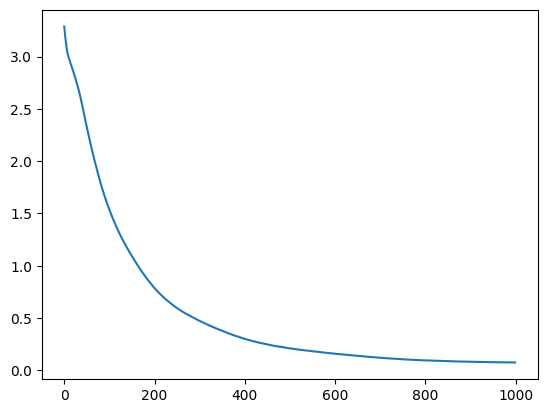

In [31]:
plt.plot(history1.history['loss'])

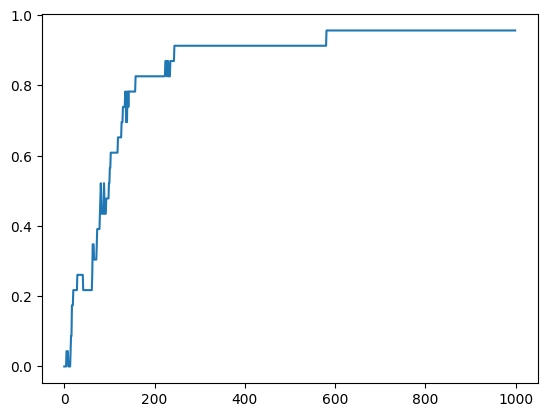

In [32]:
plt.plot(history1.history['accuracy'])

### Testing the model

In [33]:
data

'Jack and jill went up the hill\nto fetch a pail of water\njack fell down and broke his crown\nand jill came tumbling after'

In [34]:
in_text = "jill went"
encoded2 = tokenizer.texts_to_sequences([in_text])[0]
encoded2 = np.array(encoded2)

In [35]:
encoded2.shape

(2,)

In [36]:
encoded2 = encoded2.reshape(1, encoded2.shape[0], 1)

In [37]:
encoded2.shape

(1, 2, 1)

In [39]:
yhat = np.argmax(model1.predict(encoded2), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


In [40]:
yhat

array([5])

In [44]:
data

'Jack and jill went up the hill\nto fetch a pail of water\njack fell down and broke his crown\nand jill came tumbling after'

In [57]:
in_text = "Jack jill"
encoded2 = tokenizer.texts_to_sequences([in_text])[0]
encoded2 = np.array(encoded2)
encoded2 = encoded2.reshape(1, encoded2.shape[0], 1)
yhat = np.argmax(model1.predict(encoded2), axis=-1)
for word, index in tokenizer.word_index.items():
  if index == yhat:
    print(word)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
up
